In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
%matplotlib inline

# IMPORT DATASETS

IMDB,TM,TN

In [2]:
# connect IMDB
con =sqlite3.connect('zippedData/im.db')

In [3]:
# IMDB READ

df_IMDB = pd.read_sql("""
SELECT b.primary_title AS title,b.genres AS genres,r.averagerating AS ratings,r.numvotes AS votes,b.start_year
FROM movie_ratings AS r
LEFT JOIN movie_basics AS b
ON r.movie_id = b.movie_id
ORDER BY ratings DESC
""",con)
df_IMDB.head()

,title,genres,ratings,votes,start_year
0,The Paternal Bond: Barbary Macaques,Documentary,10.0,5,2015
1,Requiem voor een Boom,Documentary,10.0,5,2016
2,Freeing Bernie Baran,"Crime,Documentary",10.0,5,2010
3,Hercule contre Hermès,Documentary,10.0,5,2012
4,Pick It Up! - Ska in the '90s,Documentary,10.0,5,2019


In [4]:
df_tn = pd.read_csv('zippedData/tn.movie_budgets.csv')
df_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [5]:
df_TM = pd.read_csv('zippedData/tmdb.movies.csv')
df_TM

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


# COMBINE DATASETS

df <br>
IMDB + TN + TM <br>
2000+ movies

dfl <br>
(df LARGE) <br>
IMDB + TM <br>
23000+ movies

In [6]:
df = pd.merge(df_IMDB,df_TM,how='inner',left_on='title',right_on='title')

In [7]:
df = df.drop_duplicates()

In [8]:
df = df.merge(df_tn,left_on='title',right_on='movie')

In [9]:
df = df.drop_duplicates(subset='title')

In [10]:
df.sample(5)

,title,genres,ratings,votes,start_year,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
2716,A Thousand Words,"Comedy,Drama",5.9,36387,2012,5399,"[18, 35]",72358,en,A Thousand Words,8.017,2012-03-08,6.1,685,1,"Mar 9, 2012",A Thousand Words,"$40,000,000","$18,450,127","$20,790,486"
3316,The Last Godfather,"Comedy,Crime,Romance",3.7,1071,2010,3736,"[28, 35, 53]",70829,ko,The Last Godfather,1.400,2011-04-11,4.9,9,41,"Apr 1, 2011",The Last Godfather,"$13,400,000","$164,247","$164,247"
2623,Get Hard,"Comedy,Crime",6.0,111187,2015,14274,[35],257091,en,Get Hard,12.129,2015-03-27,6.0,1469,97,"Mar 27, 2015",Get Hard,"$40,000,000","$90,411,453","$106,511,453"
1561,White Fang,"Adventure,Animation",7.0,2048,2018,23967,"[16, 10751]",456154,fr,Croc-Blanc,15.879,2018-01-21,7.2,69,87,"Jan 18, 1991",White Fang,"$14,000,000","$34,729,091","$34,729,091"
3170,The Lost Medallion: The Adventures of Billy Stone,"Adventure,Family,Fantasy",4.9,1502,2013,8861,"[12, 10751]",171759,en,The Lost Medallion: The Adventures of Billy Stone,2.164,2013-03-01,5.5,21,31,"Mar 1, 2013",The Lost Medallion: The Adventures of Billy Stone,"$2,500,000","$549,632","$549,632"


In [11]:
dfl = pd.merge(df_IMDB,df_TM,how='inner',left_on='title',right_on='title')

In [12]:
dfl.sample(5)

,title,genres,ratings,votes,start_year,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count
5298,Vice,"Action,Adventure,Sci-Fi",4.2,14436,2015,14240,"[53, 878, 28, 12]",307663,en,Vice,14.641,2015-01-16,4.3,312
9446,All I Want for Christmas,"Comedy,Family",5.4,443,2013,9367,"[10751, 35]",249042,en,All I Want for Christmas,1.207,2013-12-15,4.8,10
5429,Hello,"Action,Romance",7.2,1305,2017,14044,[],299922,en,Hello,0.600,2014-01-01,3.5,1
358,Dog by Dog,Documentary,8.7,56,2015,16746,[99],436308,en,Dog by Dog,0.600,2015-05-13,7.7,3
7107,Cinderella,"Drama,Family,Fantasy",6.9,142792,2015,14176,"[10749, 14, 10751, 18]",150689,en,Cinderella,29.056,2015-03-13,6.7,4517


# DATA CLEANING

### df data cleaning

In [13]:
df = df[['title','genres','ratings','votes','release_date_x','production_budget','worldwide_gross']]

In [14]:
df = df.dropna()

In [15]:
df.sample(5)

,title,genres,ratings,votes,release_date_x,production_budget,worldwide_gross
3233,Yogi Bear,"Adventure,Animation,Comedy",4.6,18934,2010-12-17,"$80,000,000","$204,774,690"
404,Mad Max: Fury Road,"Action,Adventure,Sci-Fi",8.1,780910,2015-05-15,"$150,000,000","$370,098,020"
2987,Drive Angry,"Action,Fantasy,Thriller",5.4,90203,2011-02-24,"$50,000,000","$41,042,583"
3183,The Sleepwalker,Drama,4.9,632,2014-01-20,"$1,100,000","$2,636"
1661,A Simple Favor,"Comedy,Crime,Drama",6.9,83338,2018-09-14,"$20,000,000","$97,628,717"


In [16]:
df['genres'] = df['genres'].apply(lambda x: x.split(','))

In [17]:
df

,title,genres,ratings,votes,release_date_x,production_budget,worldwide_gross
0,Crossroads,[Documentary],9.3,22,2017-10-14,"$12,000,000","$57,000,000"
12,The Runaways,[Adventure],9.2,47,2010-03-19,"$9,500,000","$5,278,632"
14,The Wall,[Documentary],9.2,8,2013-06-07,"$3,000,000","$4,495,262"
22,Survivor,"[Biography, Crime, Documentary]",9.0,45,2012-08-29,"$20,000,000","$1,703,281"
28,Frankenstein,[Drama],9.0,1832,2015-08-15,"$45,000,000","$112,006,296"
...,...,...,...,...,...,...,...
3356,Red River,[Horror],2.3,179,2011-05-05,"$3,000,000","$9,012,000"
3357,Snow White: A Deadly Summer,[Horror],2.2,679,2012-03-16,"$1,000,000",$0
3358,United Passions,"[Drama, History, Sport]",2.1,3878,2015-06-05,"$30,000,000","$168,832"
3359,Foodfight!,"[Action, Animation, Comedy]",1.9,8248,2013-05-07,"$45,000,000","$73,706"


In [18]:
random.seed(2020)

In [19]:
# when have time, use other solution to clean genres
df['genres'] = df['genres'].map(lambda x: random.choice(x))

In [20]:
objects_to_floats = ['production_budget','worldwide_gross']

for x in objects_to_floats:
    df[x] = df[x].str.replace('$',"")
    df[x] = df[x].str.replace(',',"")

In [21]:
df['genres'] = df['genres'].astype('category')
df['production_budget'] = df['production_budget'].astype('float')
df['worldwide_gross'] = df['worldwide_gross'].astype('float')
df['release_date_x'] = pd.to_datetime(df['release_date_x'] )

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1775 entries, 0 to 3360
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              1775 non-null   object        
 1   genres             1775 non-null   category      
 2   ratings            1775 non-null   float64       
 3   votes              1775 non-null   int64         
 4   release_date_x     1775 non-null   datetime64[ns]
 5   production_budget  1775 non-null   float64       
 6   worldwide_gross    1775 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 99.6+ KB


### dfl data cleaning

In [23]:
dfl = dfl.drop_duplicates()

In [24]:
dfl = dfl.dropna()

In [25]:
dfl = dfl[['title','genres','ratings','votes','release_date']]

In [26]:
dfl['genres'] = dfl['genres'].apply(lambda x: x.split(','))

In [27]:
dfl['genres'] = dfl['genres'].map(lambda x: random.choice(x))

In [28]:
dfl = dfl.drop_duplicates()

In [29]:
dfl['release_date'] = pd.to_datetime(dfl['release_date'] )

In [30]:
dfl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19272 entries, 0 to 19948
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         19272 non-null  object        
 1   genres        19272 non-null  object        
 2   ratings       19272 non-null  float64       
 3   votes         19272 non-null  int64         
 4   release_date  19272 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 903.4+ KB


In [31]:
dfl.head()

,title,genres,ratings,votes,release_date
0,A Mediocre Documentary with Tom And Dan,Comedy,9.8,5,2018-05-03
1,Love on a Leash,Family,9.7,25,2013-08-13
2,Love on a Leash,Documentary,9.7,25,2013-08-13
3,Finger of God 2,Documentary,9.5,8,2018-12-04
4,"Hare Krishna! The Mantra, the Movement and the...",Documentary,9.5,829,2017-06-16


### DATA FILTER

In [32]:
df = df[(df['release_date_x'] >= '2010-01-01') & (df['release_date_x'] <= '2018-12-31')]

In [33]:
dfl = dfl[(dfl['release_date'] >= '2010-01-01') & (dfl['release_date'] <= '2018-12-31')]

In [34]:
dfl_genre_counts = dfl.groupby(by='genres')['genres'].count().sort_values(ascending=False).to_frame()

In [35]:
dfl_ratings = dfl[['genres','ratings']]

In [36]:
dfl_ratings.groupby('genres').mean().sort_values(by='ratings',ascending=False)

,ratings
genres,
News,7.226230
Documentary,7.076064
Biography,6.998353
History,6.816239
Music,6.795588
Sport,6.642771
Musical,6.384375
War,6.325243
Reality-TV,6.200000


# BASIC OBSERVATION

C:\Users\qwswe\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\qwswe\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\qwswe\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\qwswe\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


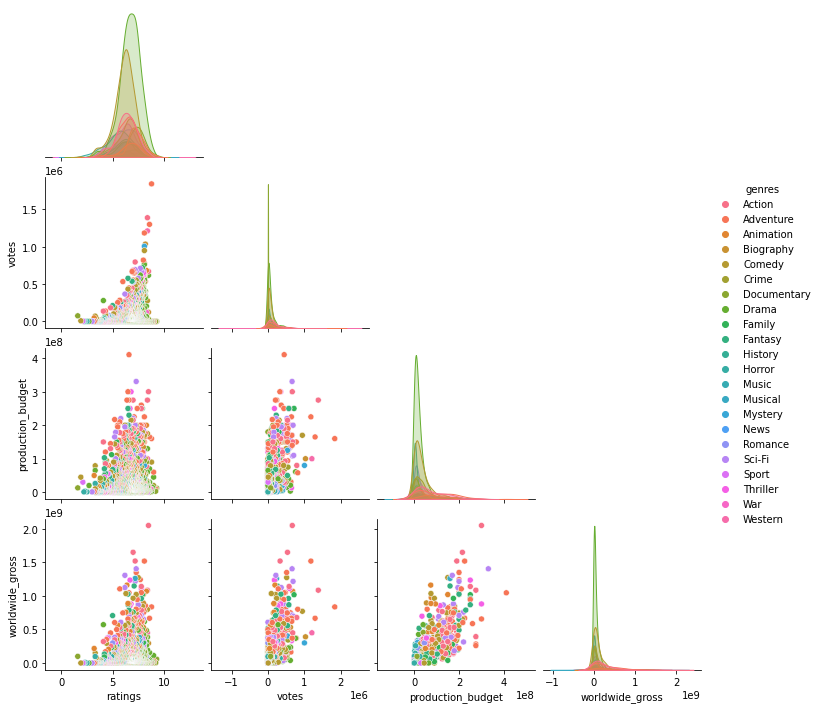

In [37]:
# basic check
sns.pairplot(df, hue = 'genres', corner = True);

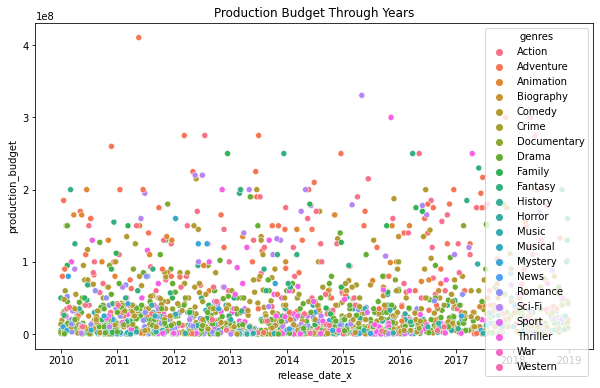

In [38]:
fig,ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x = 'release_date_x', y = 'production_budget', hue = 'genres', data = df, ax = ax)
ax.set_title('Production Budget Through Years');

# no obvious trend

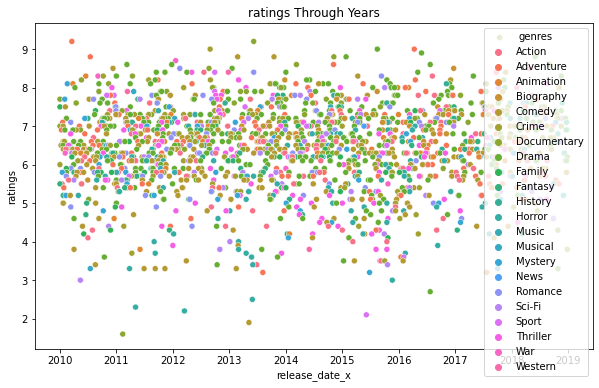

In [39]:
fig,ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x = 'release_date_x', y = 'ratings', hue = 'genres', data = df, ax = ax)
ax.set_title('ratings Through Years');

# no obvious trend

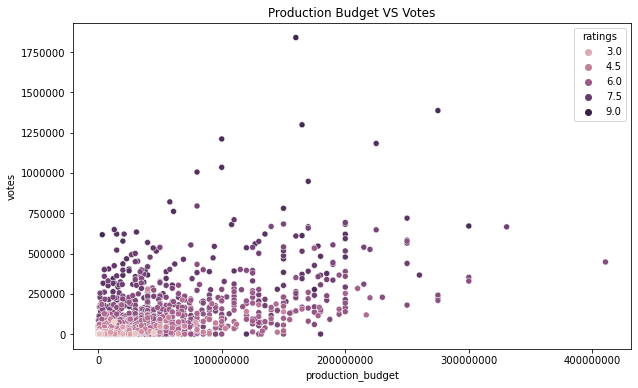

In [40]:
fig,ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x = 'production_budget', y = 'votes', hue = 'ratings', data = df, ax = ax)
ax.set_title('Production Budget VS Votes')
ax.ticklabel_format(useOffset=False,style='plain');

# jeff got this

# FINAL PLOTS
1 market share <br>
2 reputation: weighted ratings vs votes <br>
3 by season

### 1 MARKET SHARE

In [41]:
# count the profit
df['Profit'] = df['worldwide_gross'] - df['production_budget']

<ipython-input-41-2963e366e076>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Profit'] = df['worldwide_gross'] - df['production_budget']


In [42]:
df_genre_counts_profit = pd.merge(df.groupby('genres')['genres'].count(), df.groupby('genres')['Profit'].sum(),left_index=True,right_index=True)

In [44]:
df_genre_counts_profit.columns = ['counts','profits']

In [45]:
df_genre_counts_profit = df_genre_counts_profit.sort_values('counts',ascending=False)

In [46]:
df_genre_counts_profit = df_genre_counts_profit.reset_index()

In [49]:
df_genre_counts_profit

,genres,counts,profits
0,Drama,410,1.230965e+10
1,Comedy,276,2.150839e+10
2,Action,128,2.035353e+10
3,Adventure,122,2.450278e+10
4,Thriller,109,9.040017e+09
5,Crime,102,3.654038e+09
6,Horror,95,2.972156e+09
7,Romance,83,3.122535e+09
8,Documentary,74,1.683441e+09
9,Sci-Fi,58,1.195536e+10


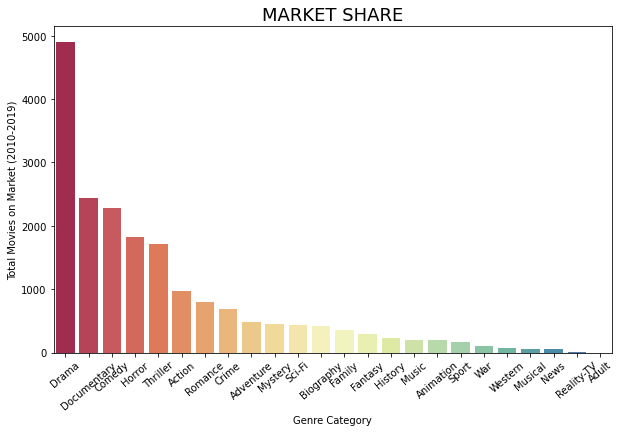

In [47]:
fig,ax = plt.subplots(figsize=(10,6))
sns.set_palette("Set1", 8, .75)
sns.barplot(x = dfl_genre_counts.index, y = 'genres', palette='Spectral', data = dfl_genre_counts, ax = ax)
ax.set_title('MARKET SHARE',fontsize = 18)
ax.set_ylabel('Total Movies on Market (2010-2019)')
ax.set_xlabel('Genre Category')
plt.xticks(rotation = 40);

# help to downsize/filter

In [ ]:
porder = df_genre_counts_profit['genres'].values

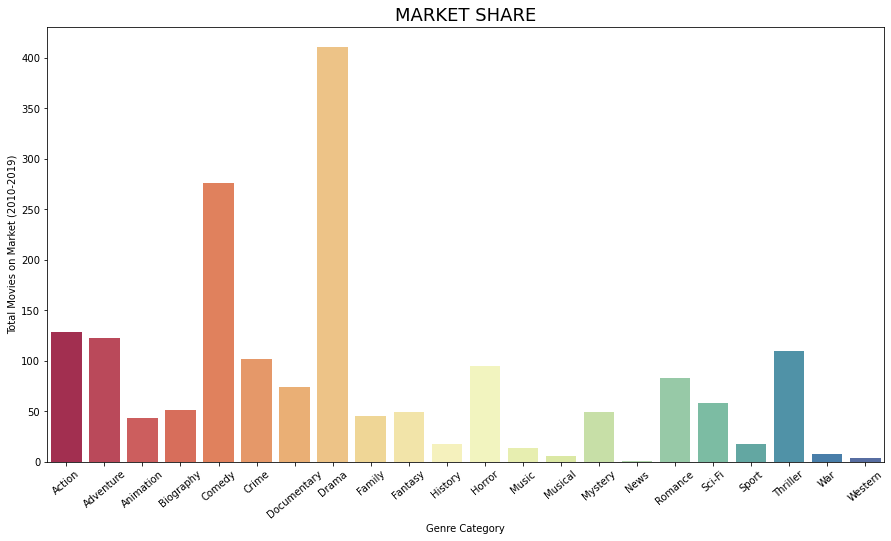

In [50]:
fig,ax = plt.subplots(figsize=(15,8))
sns.set_palette("Set1", 8, .75)
sns.barplot(x = 'genres', y = 'counts', palette='Spectral', data = df_genre_counts_profit, ax = ax)
ax.set_title('MARKET SHARE',fontsize = 18)
ax.set_ylabel('Total Movies on Market (2010-2019)')
ax.set_xlabel('Genre Category')
plt.xticks(rotation = 40);

# help to downsize/filter

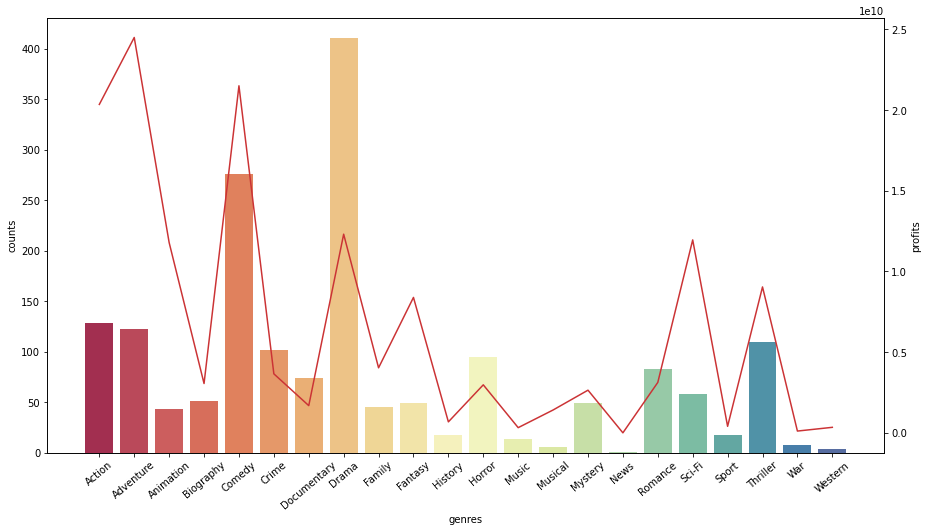

In [51]:
# try to add a lineplot

fig,ax1 = plt.subplots(figsize=(15,8))
sns.set_palette("Set1", 8, .75)
sns.barplot(x = 'genres', y = 'counts', palette='Spectral', 
            data = df_genre_counts_profit, ax = ax1)
ax.set_title('MARKET SHARE',fontsize = 18)
ax.set_xlabel('Total Movies on Market (2010-2019)')
ax.set_ylabel('Genre Category')
plt.xticks(rotation = 40)

ax2 = ax1.twinx()
sns.lineplot(y = 'profits', x = 'genres', data = df_genre_counts_profit, palette='Blues', ax = ax2);
# help to downsize/filter

In [ ]:
# which genre gets more votes/popularity

fig,ax = plt.subplots(figsize=(10,6))
sns.barplot(x = 'votes', y = 'genres', ci=None, data = dfl, ax = ax)
ax.set_title('Genre Popularity',fontsize = 18);

### 2 Reputation
(weighted)ratings vs votes

In [ ]:
# try to calculate weighted ratings
# dfl['sum_ratings'] = dfl['ratings'] * dfl['votes']

In [ ]:
# dflg = dfl.groupby('genres').sum()
# dflg['weight_avg_rating'] = dflg['sum_ratings'] / dflg['votes']

In [ ]:
# df_ratings_votes_budgets = df[['genres','ratings','votes','production_budget_million','worldwide_gross']]
# df_ratings_votes_budgets['profit'] = df_ratings_votes_budgets['worldwide_gross'] - df_ratings_votes_budgets['production_budget_million']


In [ ]:
# df_ratings_votes_budgets.groupby('genres').mean()

In [52]:
# easy solution to get the average ratings and votes
dflg = dfl.groupby('genres').mean()

In [53]:
sns.set_theme()

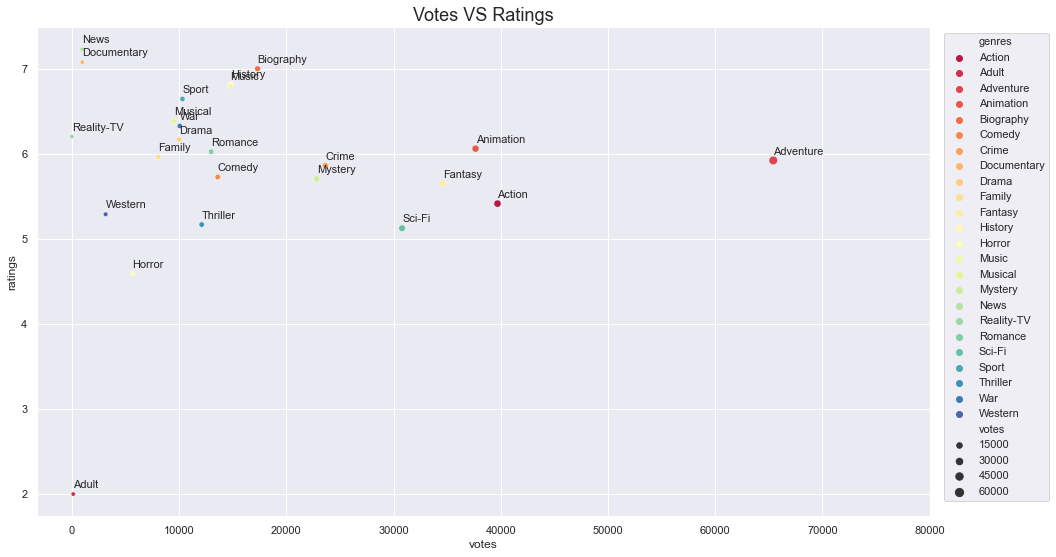

In [54]:
# votes/popularity VS ratings, hue with selected genres
# normal mean
# safe graph
# the scatter size is not changing that much

s_exp = [20*n**2 for n in range(len(dflg.index))]

fig,ax = plt.subplots(figsize=(16,9))
sns.scatterplot(x = 'votes', y = 'ratings', hue = 'genres', size = 'votes',
                palette='Spectral',data = dflg, ax = ax)
ax.set_title('Votes VS Ratings',fontsize = 18)
plt.xticks(np.arange(0,90000,10000))
ax.legend(bbox_to_anchor=(1.14, 1))

for i in range(dflg.shape[0]):
    plt.text(x = dflg.votes[i], y = dflg.ratings[i]+0.07, s = dflg.index[i],fontsize=11)

### some unfinished attempt

In [ ]:
# dflg1 to calculate weighted ratings
dflg1 = dfl
dflg1

In [ ]:
dflg1['ratings*votes'] = dflg1['ratings'] * dflg1['votes']

In [ ]:
dfl_weighted_ratings = dflg1.groupby('genres').sum()

In [ ]:
dfl_weighted_ratings['weighted_ratings'] = dfl_weighted_ratings['ratings*votes'] / dfl_weighted_ratings['votes']

In [ ]:
dfl_weighted_ratings

In [ ]:
dfl.groupby('genres')['genres'].count().sort_values(ascending=False).head(10).index

In [ ]:
dfl_weighted_ratings.index

In [ ]:
# select top 10 genres in quantity

selected_genre = dfl.groupby('genres')['genres'].count().sort_values(ascending=False).head(10).index
dfl_weighted_ratings_selected = dfl_weighted_ratings[dfl_weighted_ratings.index.isin(selected_genre)]
type(dfl_weighted_ratings_selected)

In [ ]:
# votes/popularity VS ratings, hue with selected genres
# weighted ratings

fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x = 'votes', y = 'weighted_ratings', hue = dfl_weighted_ratings_selected.index, data = dfl_weighted_ratings_selected, ax = ax)
ax.set_title('Votes VS Ratings',fontsize = 18)
plt.xticks(rotation = 40)
ax.legend(bbox_to_anchor=(1.05, 1))

for i in range(dflg.shape[0]):
    plt.text(x = dfl_weighted_ratings_selected.votes[i], y = dfl_weighted_ratings_selected.weighted_ratings[i]+0.03, s = dfl_weighted_ratings_selected.index[i])

### 3.2 ratings vs votes with profits

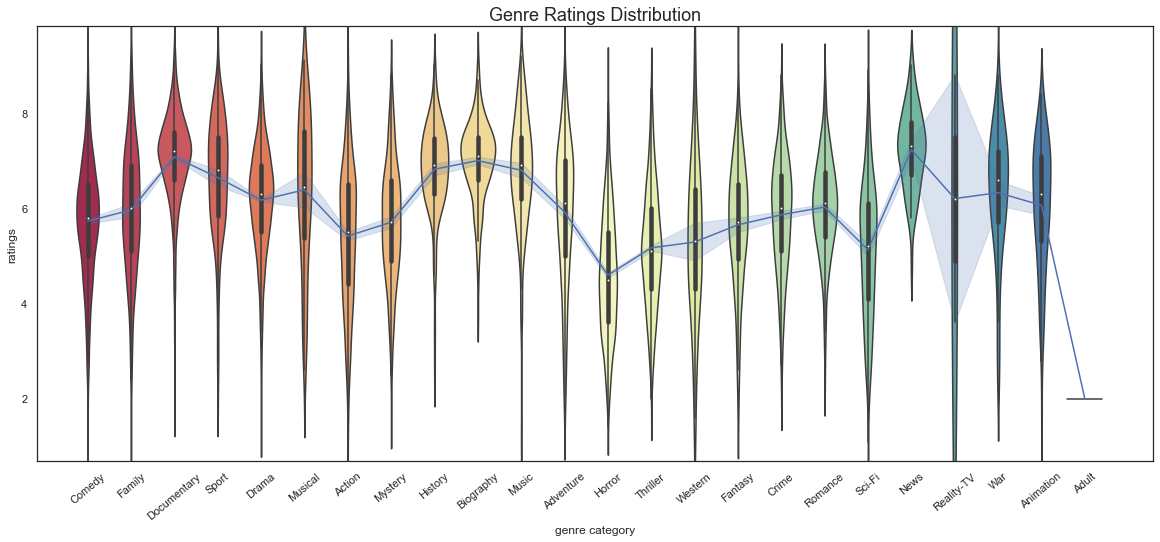

In [56]:
# safe graphy without profit line
sns.set_style("white")

fig,ax = plt.subplots(figsize=(20,8))

sns.violinplot(y = 'ratings', x = 'genres', data = dfl_ratings, palette='Spectral', ax = ax)
ax.set_title('Genre Ratings Distribution',fontsize = 18)
ax.set_xlabel('genre category')
ax.set_ylabel('ratings')
plt.xticks(rotation = 40)

sns.lineplot(y = 'ratings', x = 'genres', data = dfl_ratings, ax = ax);

# choose Documentary similar to Biography
# choose comedy?
# not Action, higher chance to get bad ratings

In [ ]:
# now try to change the line to profit

In [58]:
df_ratings_votes_profits = df[['genres','ratings','votes','production_budget','worldwide_gross']]
df_ratings_votes_profits['profit'] = df_ratings_votes_profits['worldwide_gross'] - df_ratings_votes_profits['production_budget']

<ipython-input-58-5b24ce1db61a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ratings_votes_profits['profit'] = df_ratings_votes_profits['worldwide_gross'] - df_ratings_votes_profits['production_budget']


In [59]:
df_ratings_votes_profits.drop(columns=['production_budget','worldwide_gross'])

,genres,ratings,votes,profit
0,Documentary,9.3,22,45000000.0
12,Adventure,9.2,47,-4221368.0
14,Documentary,9.2,8,1495262.0
22,Crime,9.0,45,-18296719.0
28,Drama,9.0,1832,67006296.0
...,...,...,...,...
3356,Horror,2.3,179,6012000.0
3357,Horror,2.2,679,-1000000.0
3358,Sport,2.1,3878,-29831168.0
3359,Comedy,1.9,8248,-44926294.0


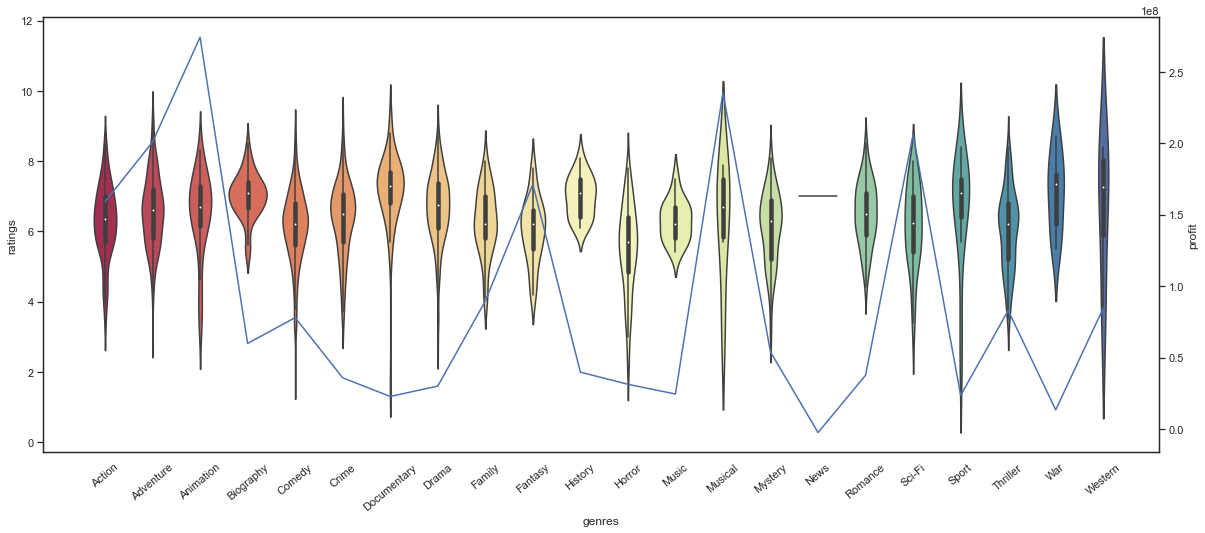

In [62]:
# use profit df instead

sns.set_style("white")

fig,ax1 = plt.subplots(figsize=(20,8))

sns.violinplot(y = 'ratings', x = 'genres', data = df_ratings_votes_profits, palette='Spectral', ax = ax1)
ax.set_title('Genre Ratings Distribution',fontsize = 18)
ax.set_xlabel('genre category')
ax.set_ylabel('ratings')
plt.xticks(rotation = 40)

ax2 = ax1.twinx()
sns.lineplot(y = 'profit', x = 'genres', data = df_ratings_votes_profits, ax = ax2,ci=None);

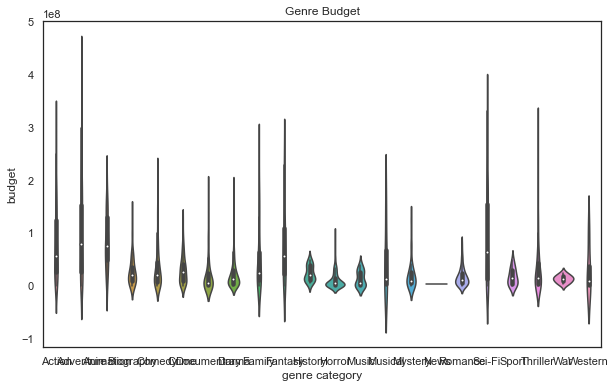

In [74]:
fig,ax = plt.subplots(figsize=(10,6))

sns.violinplot(y = 'production_budget', x = 'genres', data = df, ax = ax)
ax.set_title('Genre Budget')
ax.set_xlabel('genre category')
ax.set_ylabel('budget');

# Jeff got a better plot

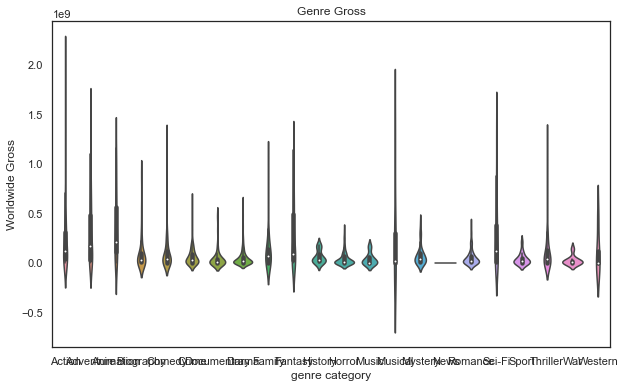

In [76]:
fig,ax = plt.subplots(figsize=(10,6))

sns.violinplot(y = 'worldwide_gross', x = 'genres', data = df, ax = ax)
ax.set_title('Genre Gross')
ax.set_xlabel('genre category')
ax.set_ylabel('Worldwide Gross');

# Jeff got this too

# TIME SERIES PLOT - TRENDS

In [66]:
selected_genre = ['Animation','Adventure','Sci-Fi','Drama','Action','Biography','Comedy']

In [68]:
# dfls means df - large dataset - selected genre
dfls = dfl[dfl['genres'].isin(selected_genre)]
dfls

,title,genres,ratings,votes,release_date
0,A Mediocre Documentary with Tom And Dan,Comedy,9.8,5,2018-05-03
6,Standing Up,Comedy,9.4,5,2013-08-16
7,Standing Up,Drama,7.0,2865,2013-08-16
10,The Harvest,Drama,6.1,6421,2013-10-19
14,Crossroads,Drama,7.8,8,2017-10-14
...,...,...,...,...,...
19941,Shark Exorcist,Action,1.4,837,2016-06-24
19943,Spyfall,Comedy,1.3,135,2014-08-27
19944,Captain Battle: Legacy War,Action,1.3,369,2013-01-12
19947,"Kidnapping, Caucasian Style",Comedy,1.1,335,2014-12-17


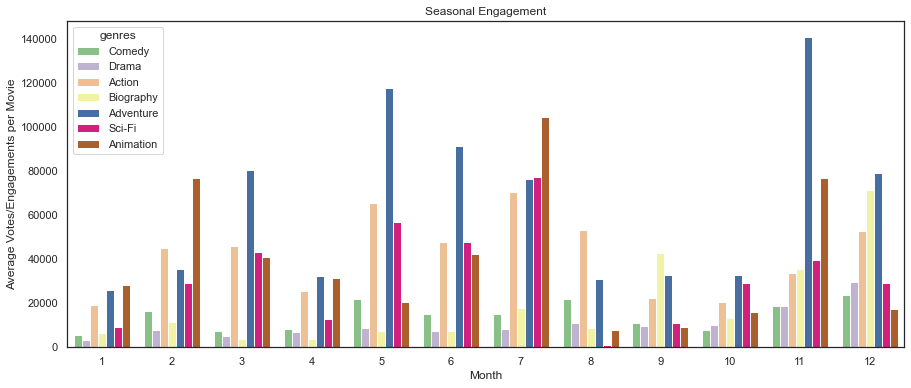

In [69]:
fig,ax = plt.subplots(figsize=(15,6))
sns.barplot(x = pd.DatetimeIndex(dfls.release_date).month, y = 'votes', hue = 'genres', palette='Accent', data = dfls, ci = None, ax = ax)
ax.set_title('Seasonal Engagement')
ax.set_xlabel('Month')
ax.set_ylabel('Average Votes/Engagements per Movie');

# 3 peaks
# adventure
# scifi
# biography
# off peak season

### some unused plots

In [ ]:
fig,ax = plt.subplots(figsize=(15,6))
sns.barplot(x = pd.DatetimeIndex(dfls.release_date).month, y = 'ratings', hue = 'genres', data = dfls, ci = None, ax = ax)
ax.set_title('ratings trend in Different Month');

# some genre obviously get better ratings in certain month
# need to seperate to grids

In [ ]:
fig,ax = plt.subplots(figsize=(15,6))
sns.scatterplot(x = pd.DatetimeIndex(dfls.release_date).month, y = 'ratings', hue = 'genres', data = dfls, ci = None, ax = ax)
ax.set_title('ratings trend in Different Month');

# an attempt

In [ ]:
sns.relplot(x = pd.DatetimeIndex(dfls.release_date).month, y = 'ratings', col = 'genres',hue = 'genres', data = dfls)
ax.set_title('ratings trend in Different Month');

# attempts

In [ ]:
fig,ax = plt.subplots(figsize=(15,6))
sns.kdeplot(x = pd.DatetimeIndex(dfls.release_date).month, y = 'ratings', hue = 'genres', data = dfls, ax = ax)
ax.set_title('ratings trend in Different Month');

# no trend T T

In [ ]:
# dfs means df - budget dataset - selected genre
dfs = df[df['genres'].isin(selected_genre)]
dfs.genres.unique()

In [ ]:
fig,ax = plt.subplots(figsize=(15,6))
sns.barplot(x = pd.DatetimeIndex(dfs.release_date_x).month, y = 'production_budget_million', hue = 'genres', data = dfs, ci = None, ax = ax)
ax.set_title('Movie Budget in Different Month')
ax.legend(bbox_to_anchor=(1.05, 1));

# Movie in 

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x = 'votes', y = 'ratings', hue = dflg.release, data = dfl, ax = ax)
ax.set_title('Votes VS Ratings',fontsize = 18)
plt.xticks(rotation = 40)
ax.legend(bbox_to_anchor=(1.05, 1))

for i in range(dflg.shape[0]):
    plt.text(x = dflg.votes[i], y = dflg.ratings[i]+0.03, s = dflg.index[i])